In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Wi-Fi CSI raw data

In [245]:
label=["CSI_Value"]
dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Raw_CSI.csv",names=label)
dataset.head(-10)

,CSI_Value
0,0
1,-0.0004883+0.0004883i
2,-0.0004883+0.00045778i
3,-0.0004883
4,0+0.0004883i
...,...
16465,0.0004883-0.0004883i
16466,0.00094607-3.0519e-05i
16467,0.00045778+0.0004883i
16468,-0.0004883+0.00097659i


# Drop duplicate CSI data (i.e repeated CSI data)

In [246]:
dataset.drop_duplicates(subset ="CSI_Value",keep = False, inplace = True)
dataset.head()

,CSI_Value
790,-0.0014954-0.00045778i
1572,-0.0014954-0.0014649i
2256,0.00094607+0.0014649i
2456,-0.0019532+0.0004883i
2530,-0.00094607+0.0004883i


# Insert CSI data into a list

In [247]:
X=dataset.values
lis=X.tolist()
print(X)
# print(lis)


[['-0.0014954-0.00045778i']
 ['-0.0014954-0.0014649i']
 ['0.00094607+0.0014649i']
 ['-0.0019532+0.0004883i']
 ['-0.00094607+0.0004883i']
 ['0.00097659+0.0019532i']
 ['-0.00045778+0.0014649i']
 ['0.00097659-0.0014954i']
 ['-3.0519e-05-0.0014954i']
 ['0.0004883+0.0014344i']
 ['0.0014649-0.00097659i']
 ['-0.0014649-3.0519e-05i']
 ['0.0019532+0.00045778i']
 ['-3.0519e-05-0.0019532i']
 ['0+0.0014344i']
 ['0.00094607+0.00094607i']
 ['-0.00097659+0.0014649i']
 ['0.0004883-0.0014954i']
 ['-0.00051881-3.0519e-05i']
 ['-0.0019532']
 ['-0.0014649+0.00097659i']
 ['0.0010071+0.00097659i']
 ['-0.0014649+0.00051881i']
 ['-0.0004883-0.00094607i']
 ['0.00051881+0.00094607i']
 ['-0.00097659-0.0019532i']
 ['0.0014649+0.00097659i']
 ['3.0519e-05+0.0014649i']
 ['0.0014344-0.00051881i']
 ['0-0.0019532i']
 ['-0.0010071-0.0014649i']
 ['-0.00094607+0.00097659i']
 ['-0.00094607+0.00094607i']]


# Replace "i" of complex number to "j" 
Since complex number in python is written as: a + bj

In [248]:
lis1=[]
k=-1
for i in lis:
    k+=1
    for s in lis[k]:
        s = s.replace('i', 'j')
        v = complex(s)
        lis1.append(v)


In [249]:
print(lis1)

[(-0.0014954-0.00045778j), (-0.0014954-0.0014649j), (0.00094607+0.0014649j), (-0.0019532+0.0004883j), (-0.00094607+0.0004883j), (0.00097659+0.0019532j), (-0.00045778+0.0014649j), (0.00097659-0.0014954j), (-3.0519e-05-0.0014954j), (0.0004883+0.0014344j), (0.0014649-0.00097659j), (-0.0014649-3.0519e-05j), (0.0019532+0.00045778j), (-3.0519e-05-0.0019532j), 0.0014344j, (0.00094607+0.00094607j), (-0.00097659+0.0014649j), (0.0004883-0.0014954j), (-0.00051881-3.0519e-05j), (-0.0019532+0j), (-0.0014649+0.00097659j), (0.0010071+0.00097659j), (-0.0014649+0.00051881j), (-0.0004883-0.00094607j), (0.00051881+0.00094607j), (-0.00097659-0.0019532j), (0.0014649+0.00097659j), (3.0519e-05+0.0014649j), (0.0014344-0.00051881j), -0.0019532j, (-0.0010071-0.0014649j), (-0.00094607+0.00097659j), (-0.00094607+0.00094607j)]


# Append Amplitude information in dataset

In [250]:
amplitudes=[]
for i in lis1:
    amp=abs(i)*1000 # Scale-up by 100 unit
    amplitudes.append(amp)

In [251]:
print(amplitudes[:10])
print("\nMaximum amplitude value=",max(amplitudes))


[1.5639001529509484, 2.0933593026520794, 1.7438407194752623, 2.0133124769891038, 1.0646526827562124, 2.1837395147086567, 1.5347620461817526, 1.7860428852913919, 1.4957113924019567, 1.5152360377182164]

Maximum amplitude value= 2.1837395147086567


In [252]:

import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Raw_CSI.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Amp.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append(amplitudes[i])
            writer.writerow(row)
            i+=1
            if i==len(amplitudes):
                break

print("Amplitude data appended successfully")
            

Amplitude data appended successfully


In [253]:
label=["CSI_Value","Amplitude_m"]
df_amp=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Amp.csv",names=label)
df_amp.head(10)

,CSI_Value,Amplitude_m
0,0,1.563900
1,-0.0004883+0.0004883i,2.093359
2,-0.0004883+0.00045778i,1.743841
3,-0.0004883,2.013312
4,0+0.0004883i,1.064653
5,0,2.183740
6,0.00045778,1.534762
7,-0.0004883,1.786043
8,-0.0004883,1.495711
9,-0.0004883-0.0004883i,1.515236


# Append Phase information in dataset

In [254]:
# importing "cmath" for complex number operations

import cmath
amplitudes=[]
phases=[]
for i in lis1:
    out_phase=cmath.phase(i)
    phases.append(out_phase)
    

In [255]:
print(phases[0:10])
print("\nMaximum phase value=",max(phases))


[-2.844525696097374, -2.366497135483908, 0.9973612199670133, 2.896613990462929, 2.665120387716006, 1.107152813645198, 1.873680417785533, -0.9922710600022107, -1.5912020803714104, 1.2426804195716306]

Maximum phase value= 3.141592653589793


In [256]:
import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Amp.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Phase.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        j=0
        for phs_row in csv.reader(csvinput):
            phs_row.append(phases[j])
            writer.writerow(phs_row)
            j+=1
            if j==len(phases):
                break
#            print(row)

print("Phase appended successfully")
            

Phase appended successfully


In [257]:
label=["CSI Value","Amplitude_m", "Phase_rad"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Phase.csv",names=label)

final_dataset.head(10)

,CSI Value,Amplitude_m,Phase_rad
0,0,1.563900,-2.844526
1,-0.0004883+0.0004883i,2.093359,-2.366497
2,-0.0004883+0.00045778i,1.743841,0.997361
3,-0.0004883,2.013312,2.896614
4,0+0.0004883i,1.064653,2.665120
5,0,2.183740,1.107153
6,0.00045778,1.534762,1.873680
7,-0.0004883,1.786043,-0.992271
8,-0.0004883,1.495711,-1.591202
9,-0.0004883-0.0004883i,1.515236,1.242680


## Activity: Walking, Standing, Sitting, Falling, Get_down, Get_up, No_Person 

In [258]:
import csv
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Phase.csv",'r') as csvinput:
    with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Activity.csv", 'w') as csvoutput:
        writer = csv.writer(csvoutput)
        i=0
        for row in csv.reader(csvinput):
            row.append("Falling")
            writer.writerow(row)
            i+=1
print("Activity appended successfully")

Activity appended successfully


In [259]:
label=["CSI Value","Amplitude_m", "Phase_rad","Activity"]
final_dataset=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Activity.csv",names=label)

final_dataset.head(10)

,CSI Value,Amplitude_m,Phase_rad,Activity
0,0,1.563900,-2.844526,Falling
1,-0.0004883+0.0004883i,2.093359,-2.366497,Falling
2,-0.0004883+0.00045778i,1.743841,0.997361,Falling
3,-0.0004883,2.013312,2.896614,Falling
4,0+0.0004883i,1.064653,2.665120,Falling
5,0,2.183740,1.107153,Falling
6,0.00045778,1.534762,1.873680,Falling
7,-0.0004883,1.786043,-0.992271,Falling
8,-0.0004883,1.495711,-1.591202,Falling
9,-0.0004883-0.0004883i,1.515236,1.242680,Falling


In [260]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CSI Value    33 non-null     object 
 1   Amplitude_m  33 non-null     float64
 2   Phase_rad    33 non-null     float64
 3   Activity     33 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

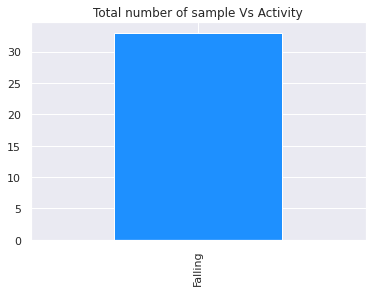

In [261]:
sns.set(color_codes=True)
final_dataset['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


# Final Dataset preparation

In [262]:
import csv
row_csi=[]
csi_amp=[]
csi_phs=[]
csi_activity=[]
with open("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/Falling/Falling_room_Phase.csv",'r') as csvinput:    
        for row in csv.reader(csvinput):
            row_csi.append(row[0])
            csi_amp.append(row[1])
            csi_phs.append(row[2])
            csi_activity.append("Falling")
            
print("All data append in respective list successfully")            
           

All data append in respective list successfully


In [263]:
# print(row_csi)

# For dataset without repeated CSI value

In [264]:

data = {'CSI_Value': row_csi,"Amplitude_m":csi_amp, "Phase_rad":csi_phs, "Activity":csi_activity }

# Make data frame of above data
df = pd.DataFrame(data)
 
# Append data frame to CSV file
df.to_csv('/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room.csv', mode='a', index=False, header=False)
 

print("Data appended to final dataset successfully.")


Data appended to final dataset successfully.


In [265]:
# label=["CSI Value","Amplitude_m", "Phase_rad","Activity"]
df=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room.csv") # names=label

df.head(-10)

,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.0004883+0.0004883i,1.495711,3.121187,Walking
1,0-0.0004883i,2.589975,1.196861,Walking
2,0.00045778+0.0004883i,4.172037,-1.212026,Walking
3,0.0004883-0.0004883i,2.929800,0.000000,Walking
4,0-3.0519e-05i,2.873450,-2.606634,Walking
...,...,...,...,...
258,-3.0519e-05,0.519707,-3.082835,Falling
259,0,1.953200,3.141593,Falling
260,0-3.0519e-05i,1.760585,2.553595,Falling
261,-0.00097659-0.00097659i,1.402847,0.770019,Falling


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

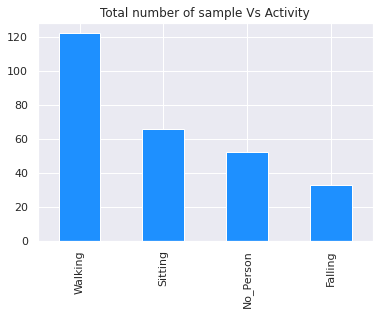

In [266]:
sns.set(color_codes=True)
df['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')


# For dataset with repeated CSI value in dataset

In [241]:
data = {'CSI_Value': row_csi,"Amplitude_m":csi_amp, "Phase_rad":csi_phs, "Activity":csi_activity }

# Make data frame of above data
df = pd.DataFrame(data)
 
# Append data frame to CSV file
df.to_csv('/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room_final.csv', mode='a', index=False, header=False)
 

print("Data appended to final dataset successfully.")

Data appended to final dataset successfully.


In [5]:

df2=pd.read_csv("/home/ranjit/Thesis/CSI_Matlab/CSI_Dataset_final/All_Activity_room_final.csv")

df2

,Time_Stamp_Sec,CSI_Value,Amplitude_m,Phase_rad,Activity
0,0.032768,0.0004883+0.0004883i,0.690560,0.785398,Walking
1,0.065536,0-0.0004883i,0.488300,-1.570796,Walking
2,0.098304,0.00045778+0.0004883i,0.669328,0.817646,Walking
3,0.131070,0.0004883-0.0004883i,0.690560,-0.785398,Walking
4,0.163840,0-3.0519e-05i,0.030519,-1.570796,Walking
...,...,...,...,...,...
160158,5248.100000,0.00094607-0.0010071i,1.381774,-0.816635,Falling
160159,5248.100000,0-0.0004883i,0.488300,-1.570796,Falling
160160,5248.200000,0+0.0004883i,0.488300,1.570796,Falling
160161,5248.200000,0.00045778+0.0004883i,0.669328,0.817646,Falling


<AxesSubplot:title={'center':'Total number of sample Vs Activity'}>

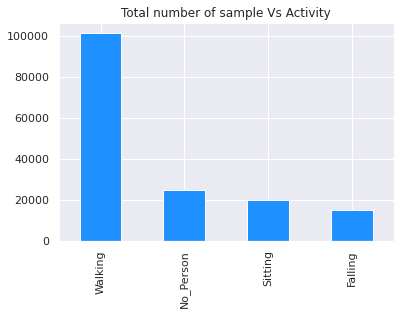

In [4]:
sns.set(color_codes=True)
df2['Activity'].value_counts().plot(kind='bar',color="dodgerblue",title='Total number of sample Vs Activity')